In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the uploaded files to examine their contents
file_path_ymo = "updated_Y_M_O_par_similarity.csv"
file_path_mfa = "updated_M_F_A_par_similarity.csv"

data_ymo = pd.read_csv(file_path_ymo)
data_mfa = pd.read_csv(file_path_mfa)

# Display the first few rows of each dataset to understand their structure
data_ymo.head(), data_mfa.head()


(   Unnamed: 0                                           Original  \
 0           0   Tracy didn't go home that evening and resiste...   
 1           1   Sydney walked past a homeless woman asking fo...   
 2           2   Sasha protected the patients' rights by makin...   
 3           3   Jordan was in charge of taking the food on th...   
 4           4   Kendall opened their mouth to speak and what ...   
 
                                        Paraphrases_y  \
 0   Tracy totally ignored Riley's attempts to tal...   
 1   Sydney breezed by a homeless chick begging fo...   
 2   Sasha was all about protecting cancer patient...   
 3   OMG, can you believe Jordan totally forgot to...   
 4   Kendall dropped some serious knowledge that l...   
 
                                        Paraphrases_m  \
 0   Tracy refused to go home and resisted Riley's...   
 1   Sydney walked past a homeless woman asking fo...   
 2   Sasha made sure that cancer patients were wel...   
 3   It seem

In [4]:
# Calculating average perplexity for each demographic set in both datasets
average_perplexity_ymo = {
    'young': data_ymo['perplexity_young'].mean(),
    'middle': data_ymo['perplexity_middle'].mean(),
    'old': data_ymo['perplexity_old'].mean()
}

average_perplexity_mfa = {
    'male': data_mfa['perplexity_male'].mean(),
    'female': data_mfa['perplexity_female'].mean(),
    'ambiguous': data_mfa['perplexity_ambiguous'].mean(),
    'baseline': data_mfa['perplexity_baseline'].mean()
}

# Calculating accuracy for each set: choice_N == target
accuracy_ymo = {
    'young': (data_ymo['choice_y'] == data_ymo['target']).mean(),
    'middle': (data_ymo['choice_m'] == data_ymo['target']).mean(),
    'old': (data_ymo['choice_o'] == data_ymo['target']).mean(),
    'baseline': (data_ymo['choice_b'] == data_ymo['target']).mean()
}

accuracy_mfa = {
    'male': (data_mfa['choice_m'] == data_mfa['target']).mean(),
    'female': (data_mfa['choice_f'] == data_mfa['target']).mean(),
    'ambiguous': (data_mfa['choice_amb'] == data_mfa['target']).mean(),
    'baseline': (data_mfa['choice_b'] == data_mfa['target']).mean()
}

average_perplexity_ymo, average_perplexity_mfa, accuracy_ymo, accuracy_mfa


({'young': 124.65622641963664,
  'middle': 78.59139089028146,
  'old': 79.64853776028147},
 {'male': 94.45579814034288,
  'female': 79.22125552297338,
  'ambiguous': 119.16451485833674,
  'baseline': 77.58836072637156},
 {'young': 0.5501535312180144,
  'middle': 0.5808597748208802,
  'old': 0.567553735926305,
  'baseline': 0.579324462640737},
 {'male': 0.5762538382804504,
  'female': 0.5706243602865916,
  'ambiguous': 0.563971340839304,
  'baseline': 0.579324462640737})

In [5]:
# Data preparation for line plot
import numpy as np

# Combining data for plotting
data_points = {
    'Young': (accuracy_ymo['young'], average_perplexity_ymo['young']),
    'Middle': (accuracy_ymo['middle'], average_perplexity_ymo['middle']),
    'Old': (accuracy_ymo['old'], average_perplexity_ymo['old']),
    'Male': (accuracy_mfa['male'], average_perplexity_mfa['male']),
    'Female': (accuracy_mfa['female'], average_perplexity_mfa['female']),
    'Ambiguous': (accuracy_mfa['ambiguous'], average_perplexity_mfa['ambiguous']),
    'Baseline': (accuracy_mfa['baseline'], average_perplexity_mfa['baseline'])
}

# # Creating the plot
# fig, ax1 = plt.subplots(figsize=(10, 6))
# ax1.set_title('Perplexity vs Accuracy for Demographic Sets')

# # Primary axis for Perplexity
# ax1.set_xlabel('Accuracy')
# ax1.set_ylabel('Perplexity')
# ax1.plot([v[0] for v in data_points.values()], [v[1] for v in data_points.values()], 'bo-')
# ax1.grid(True)

# # Annotate points with demographic labels
# for label, point in data_points.items():
#     ax1.annotate(label, (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')

# # Add secondary axis for labels if needed (not necessary as labels are annotated)
# plt.show()


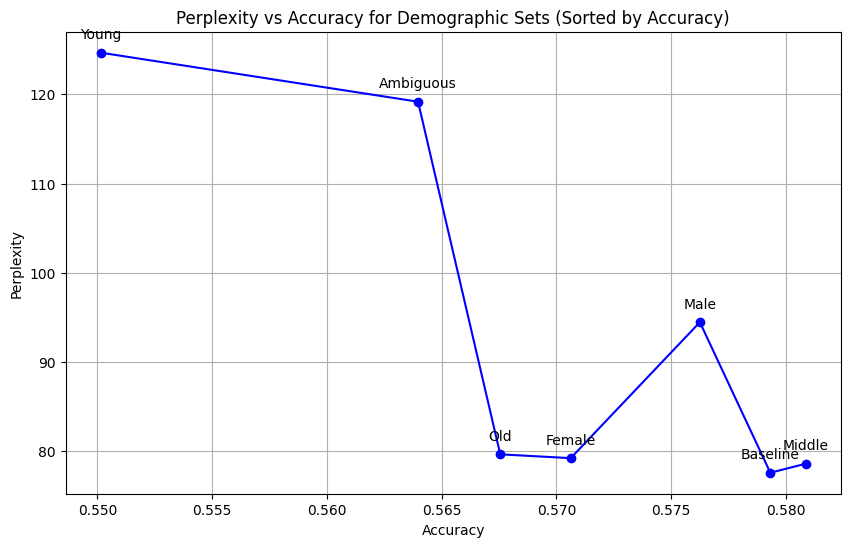

In [6]:
# Sorting the data points by accuracy
sorted_data_points = {k: v for k, v in sorted(data_points.items(), key=lambda item: item[1][0])}

# Creating the plot with sorted data
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Perplexity vs Accuracy for Demographic Sets (Sorted by Accuracy)')

# Primary axis for Perplexity
ax1.set_xlabel('Accuracy')
ax1.set_ylabel('Perplexity')
ax1.plot([v[0] for v in sorted_data_points.values()], [v[1] for v in sorted_data_points.values()], 'bo-')
ax1.grid(True)

# Annotate points with demographic labels
for label, point in sorted_data_points.items():
    ax1.annotate(label, (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


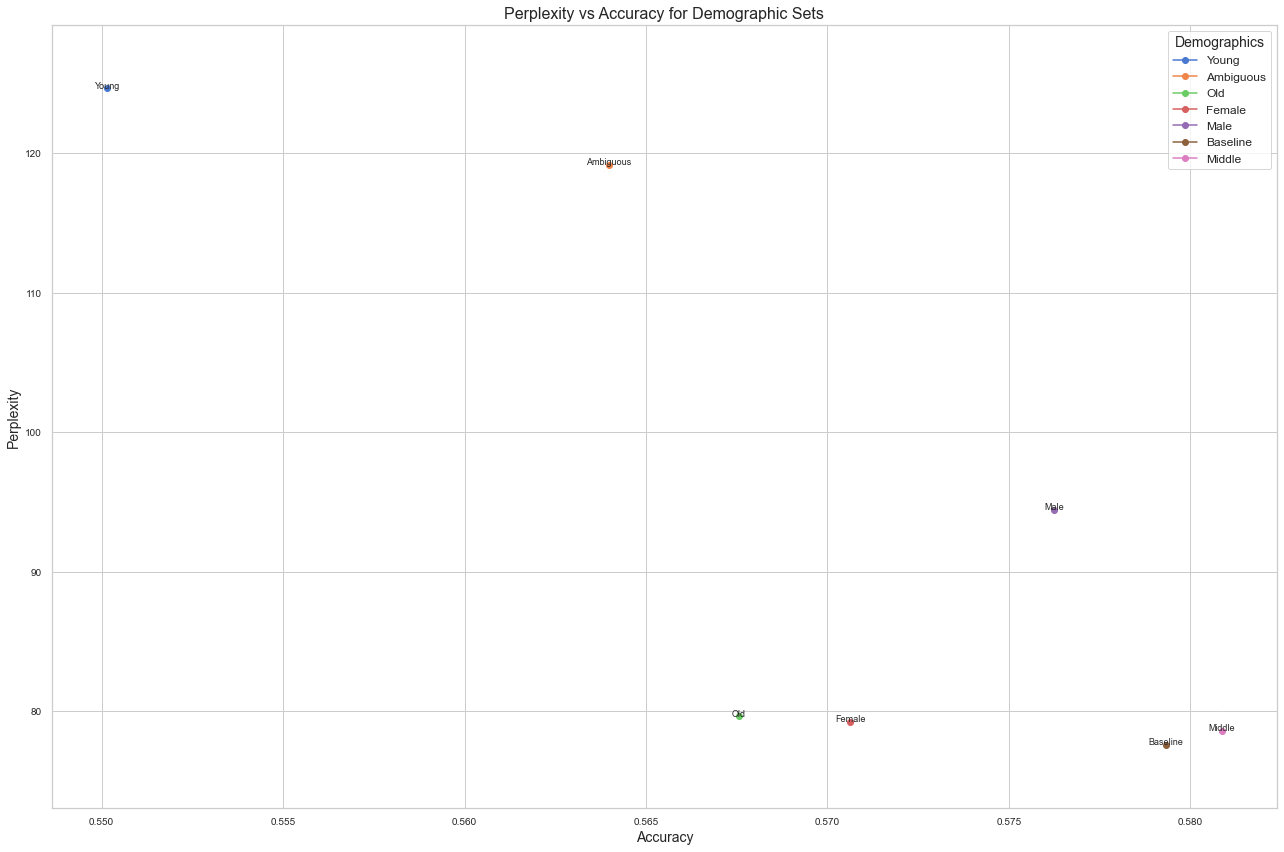

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated data setup
# sorted_data_points = {
#     'Demographic A': (70, 20),
#     'Demographic B': (75, 25),
#     'Demographic C': (80, 30),
#     'Demographic D': (85, 35)
# }

# Converting data into a DataFrame
import pandas as pd
data = {
    'Demographic': list(sorted_data_points.keys()),
    'Accuracy': [point[0] for point in sorted_data_points.values()],
    'Perplexity': [point[1] for point in sorted_data_points.values()]
}
df = pd.DataFrame(data)

# Set the aesthetic style of the plots
sns.set(style="whitegrid", palette="muted")

# Create the plot
plt.figure(figsize=(18, 12))

# Plotting each demographic's data with variance shadow
for demographic in df['Demographic'].unique():
    subset = df[df['Demographic'] == demographic]
    accuracy = subset['Accuracy']
    perplexity = subset['Perplexity']
    plt.plot(accuracy, perplexity, marker='o', label=demographic)
    plt.fill_between(accuracy, perplexity - 2, perplexity + 2, alpha=0.2)

# Annotating points
for index, row in df.iterrows():
    plt.text(row['Accuracy'], row['Perplexity'], row['Demographic'], fontsize=9, ha='center')

# Set titles and labels
plt.title('Perplexity vs Accuracy for Demographic Sets', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Perplexity', fontsize=14)

# Configure legend and tick sizes
plt.legend(title='Demographics', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjusting the plot
plt.tight_layout()

# Saving the plot
plt.savefig('perplexity_accuracy_demographic_sets_improved.png', dpi=300)
plt.show()


In [8]:
# SMALL = 26
# MEDIUM = 30
# LARGE = 38

SMALL = 30
MEDIUM = 44
LARGE = 52

SMALL_SIZE = 30
MEDIUM_SIZE = 44
BIGGER_SIZE = 52

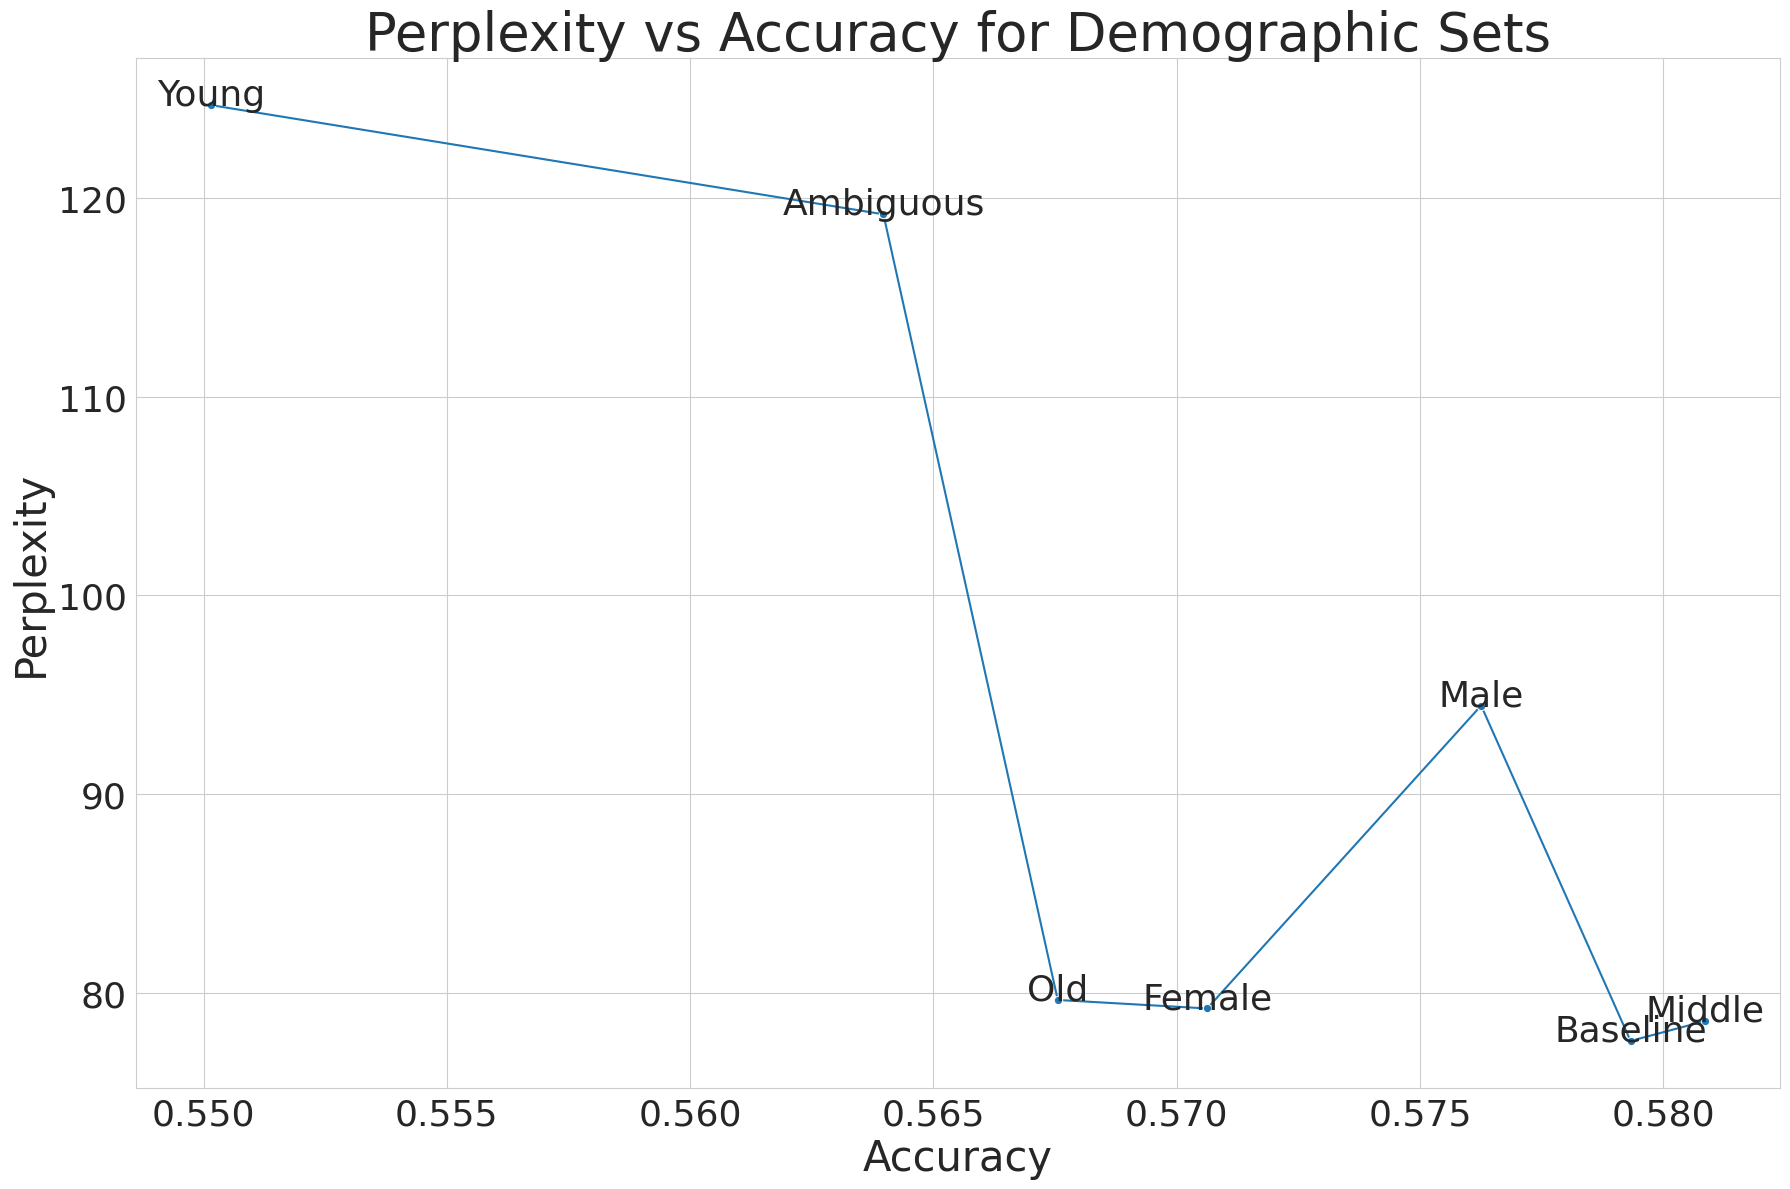

In [7]:
import seaborn as sns

# Create the Seaborn plot
plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")

plot = sns.lineplot(x=[v[0] for v in sorted_data_points.values()], y=[v[1] for v in sorted_data_points.values()], marker='o')

# Annotating points with demographic labels
for label, point in sorted_data_points.items():
    plt.text(point[0], point[1], label, fontsize=SMALL, ha='center')

# Set titles and labels with specific font sizes
plot.set_title('Perplexity vs Accuracy for Demographic Sets', fontsize=LARGE)
plot.set_xlabel('Accuracy', fontsize=MEDIUM)
plot.set_ylabel('Perplexity', fontsize=MEDIUM)

# Configure the legend and tick sizes
# plt.legend(title='Demographics', fontsize=MEDIUM, title_fontsize=MEDIUM)
plt.xticks(fontsize=SMALL)
plt.yticks(fontsize=SMALL)

# Adjusting the plot and saving
plt.tight_layout()
plt.savefig('perplexity_accuracy_demographic_sets.png', dpi=300)
plt.show()


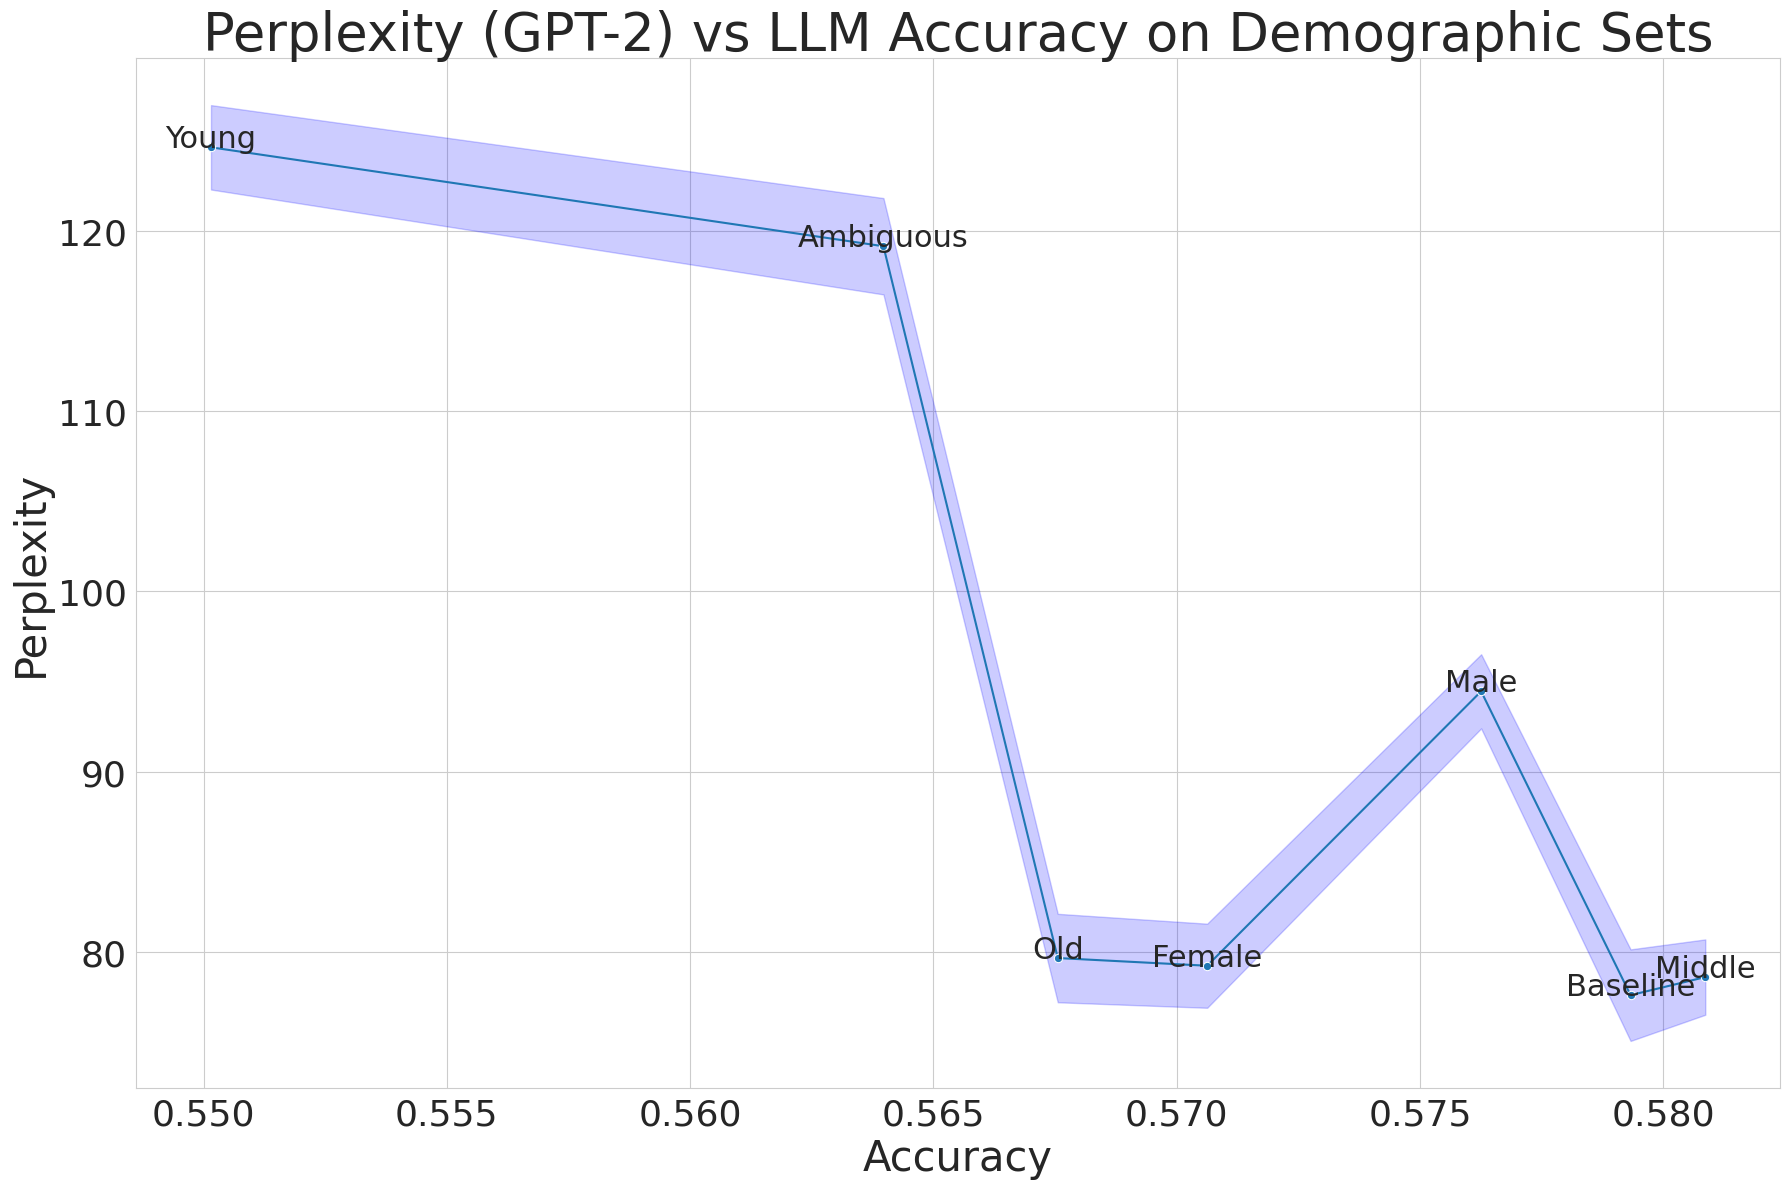

In [9]:
import seaborn as sns

SMALL = 26
MEDIUM = 30
LARGE = 38

# Create the Seaborn plot
plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")

np.random.seed(0)  # For reproducibility
variance_data = {k: np.random.rand() * 10 for k in sorted_data_points.keys()}

# Sorting variance data points by the same key as the sorted_data_points
sorted_variance = {k: variance_data[k] for k in sorted_data_points.keys()}

# We need to calculate the upper and lower bounds for the confidence interval (CI)
# For the purposes of this example, let's assume the variance is the square of standard deviation
ci_upper = [v[1] + variance_data[k]**0.5 for k, v in sorted_data_points.items()]
ci_lower = [v[1] - variance_data[k]**0.5 for k, v in sorted_data_points.items()]

plt.fill_between(x=[v[0] for v in sorted_data_points.values()], y1=ci_lower, y2=ci_upper, color='blue', alpha=0.2)




plot = sns.lineplot(x=[v[0] for v in sorted_data_points.values()], y=[v[1] for v in sorted_data_points.values()], marker='o')

# Annotating points with demographic labels
for label, point in sorted_data_points.items():
    plt.text(point[0], point[1], label, fontsize=22, ha='center')

# Set titles and labels with specific font sizes
plot.set_title('Perplexity (GPT-2) vs LLM Accuracy on Demographic Sets', fontsize=LARGE)
plot.set_xlabel('Accuracy', fontsize=MEDIUM)
plot.set_ylabel('Perplexity', fontsize=MEDIUM)

# Configure the legend and tick sizes
# plt.legend(title='Demographics', fontsize=MEDIUM, title_fontsize=MEDIUM)
plt.xticks(fontsize=SMALL)
plt.yticks(fontsize=SMALL)

# Adjusting the plot and saving
plt.tight_layout()
plt.savefig('perplexity_accuracy_demographic_sets_paper.png', dpi=300)
plt.show()


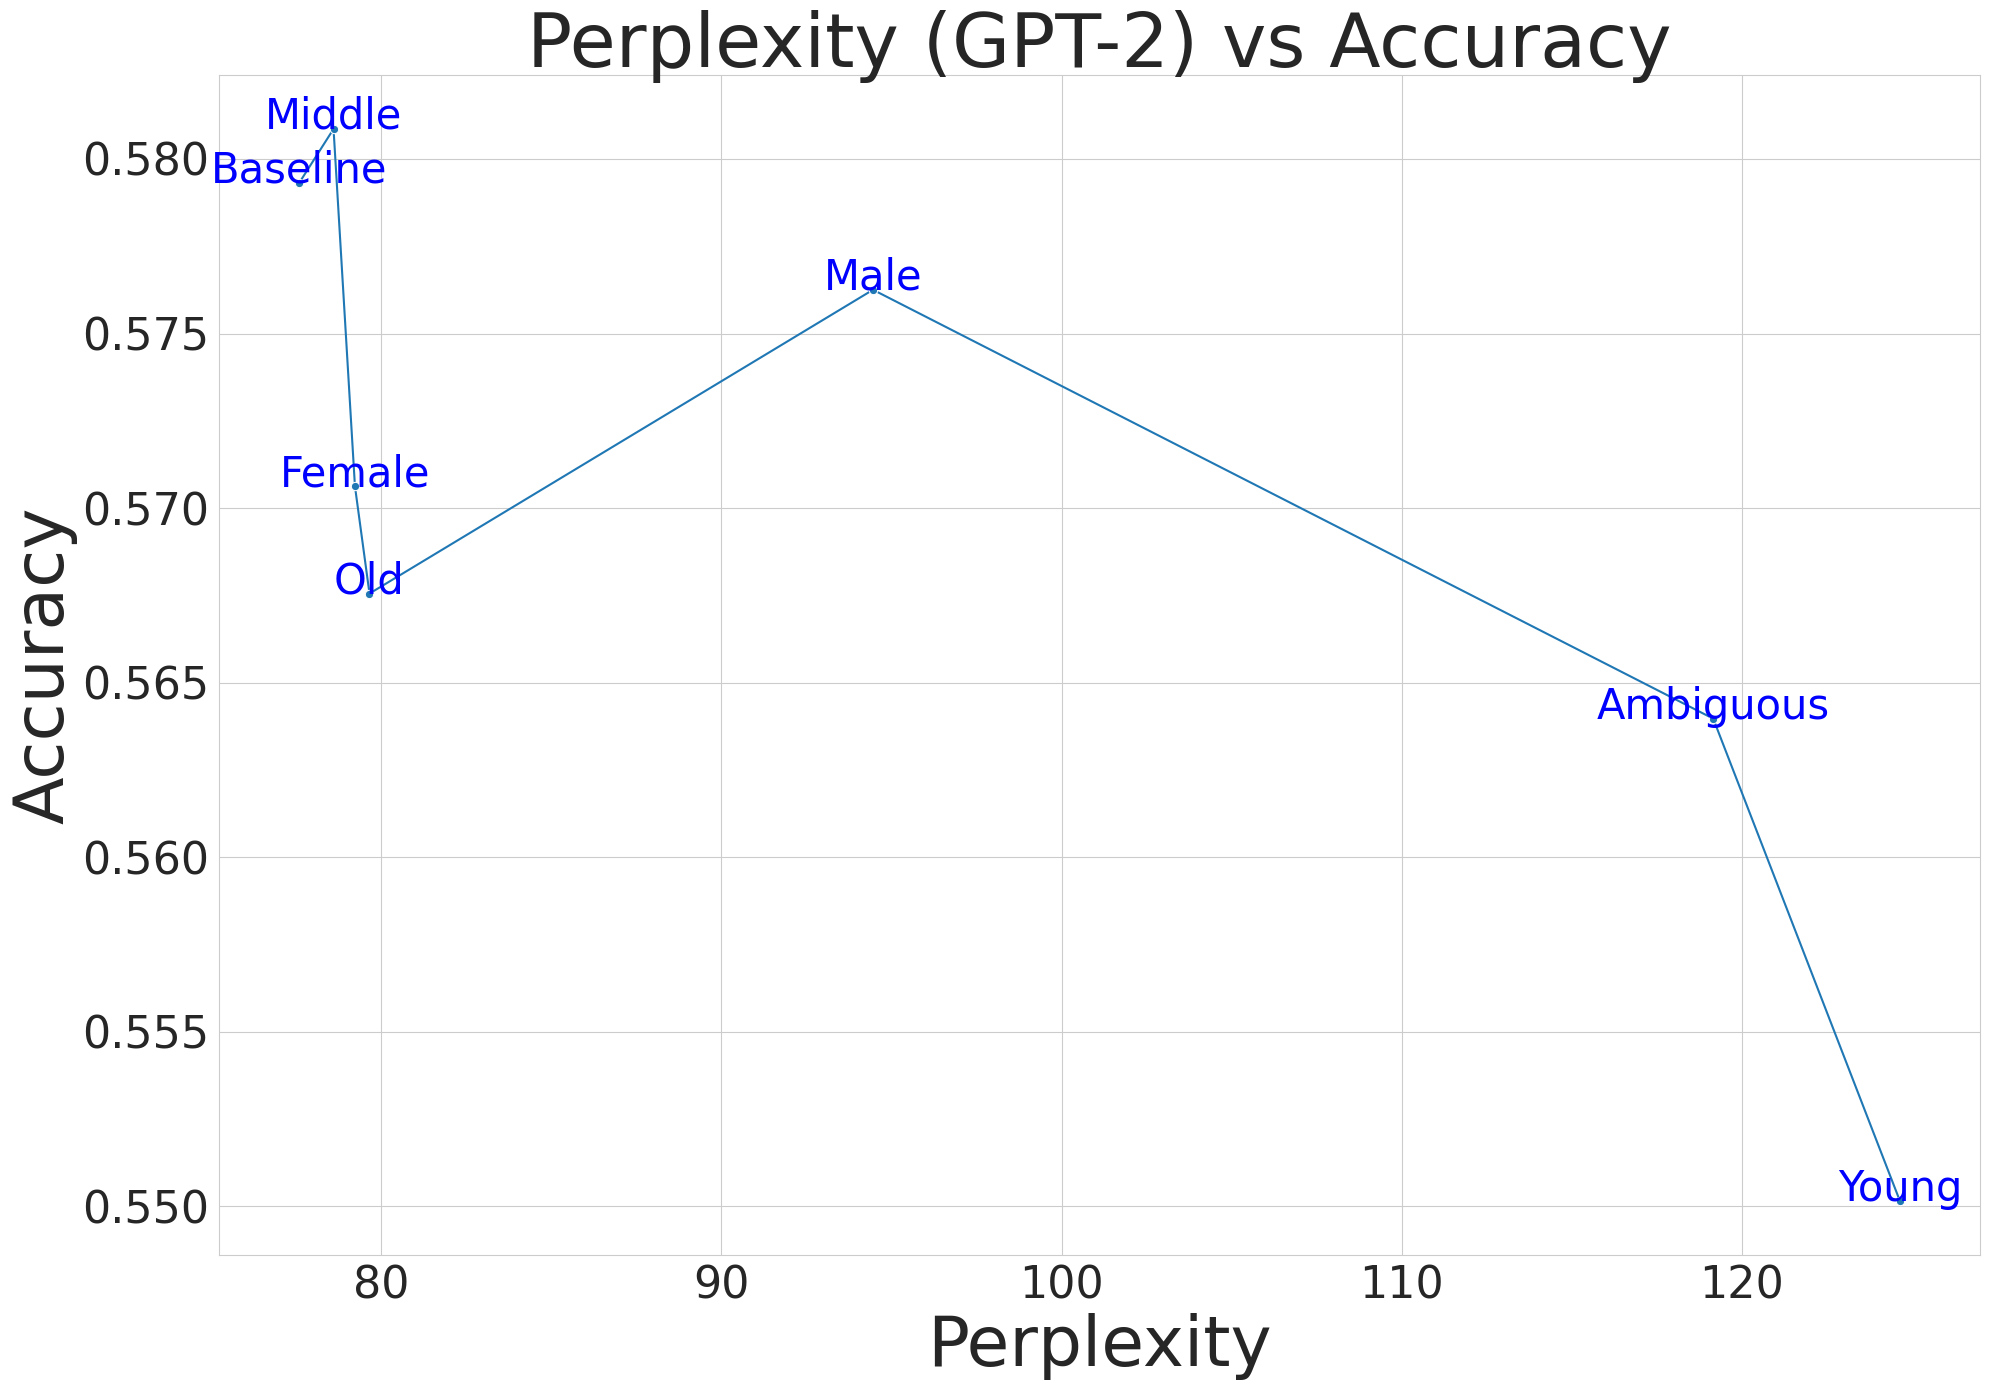

In [19]:
SMALL = 32
MEDIUM = 50
LARGE = 54

plt.figure(figsize=(20, 14))
sns.set_style("whitegrid")

np.random.seed(0)  # For reproducibility
variance_data = {k: np.random.rand() * 10 for k in sorted_data_points.keys()}

# Calculating the confidence intervals for the plot, assuming variance is square of standard deviation
ci_data = {
    k: (sorted_data_points[k][1] - variance_data[k]**0.5, sorted_data_points[k][1] + variance_data[k]**0.5) for k in sorted_data_points.keys()
}

# Creating a DataFrame from the data
df = pd.DataFrame({
    'Label': sorted_data_points.keys(),
    'Perplexity': [v[1] for v in sorted_data_points.values()],
    'Accuracy': [v[0] for v in sorted_data_points.values()],
    'CI Lower': [ci_data[k][0] for k in sorted_data_points.keys()],
    'CI Upper': [ci_data[k][1] for k in sorted_data_points.keys()]
})

# Sorting by Perplexity to ensure proper alignment on the plot
df.sort_values('Perplexity', inplace=True)

# plt.fill_betweenx(y=df['Accuracy'], x1=df['CI Lower'], x2=df['CI Upper'], color='blue', alpha=0.2)

plot = sns.lineplot(y=df['Accuracy'], x=df['Perplexity'], marker='o')

# Annotating points with demographic labels
for _, row in df.iterrows():
    plt.text(row['Perplexity'], row['Accuracy'], row['Label'], fontsize=30, ha='center', color='blue')

# Setting titles and labels with specific font sizes
plot.set_title('Perplexity (GPT-2) vs Accuracy', fontsize=LARGE)
plot.set_ylabel('Accuracy', fontsize=MEDIUM)
plot.set_xlabel('Perplexity', fontsize=MEDIUM)

# Configuring the legend and tick sizes
plt.yticks(fontsize=SMALL)
plt.xticks(fontsize=SMALL)

# Adjusting the plot and saving
plt.tight_layout()
# plt.savefig('perplexity_accuracy_demographic_sets_paper.png', dpi=300)
plt.show()

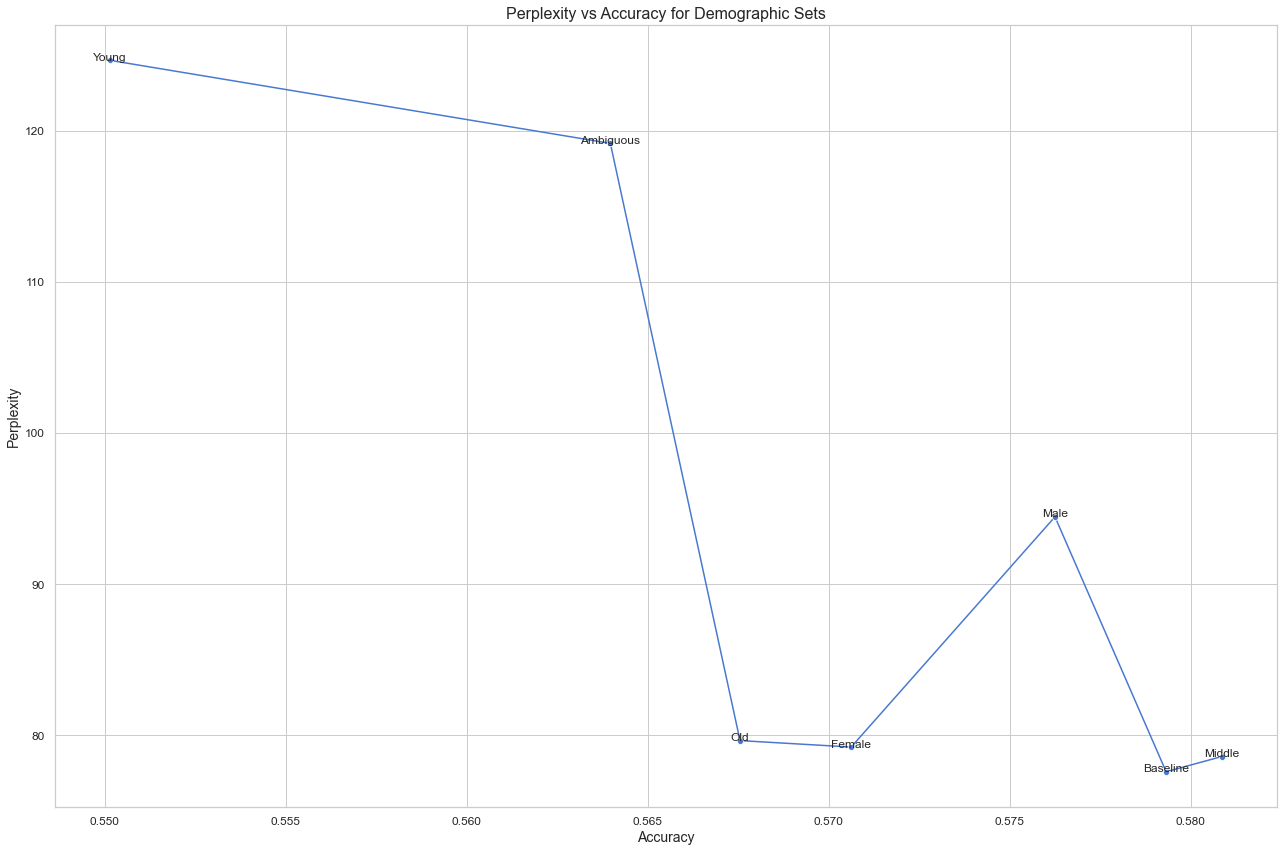

In [12]:
import seaborn as sns

# Create the Seaborn plot
plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")

plot = sns.lineplot(x=[v[0] for v in sorted_data_points.values()], y=[v[1] for v in sorted_data_points.values()], marker='o')

# Annotating points with demographic labels
for label, point in sorted_data_points.items():
    plt.text(point[0], point[1], label, fontsize=SMALL, ha='center')

# Set titles and labels with specific font sizes
plot.set_title('Perplexity vs Accuracy for Demographic Sets', fontsize=LARGE)
plot.set_xlabel('Accuracy', fontsize=MEDIUM)
plot.set_ylabel('Perplexity', fontsize=MEDIUM)

# Configure the legend and tick sizes
# plt.legend(title='Demographics', fontsize=MEDIUM, title_fontsize=MEDIUM)
plt.xticks(fontsize=SMALL)
plt.yticks(fontsize=SMALL)

# Adjusting the plot and saving
plt.tight_layout()
plt.savefig('perplexity_accuracy_demographic_sets.png', dpi=300)
plt.show()


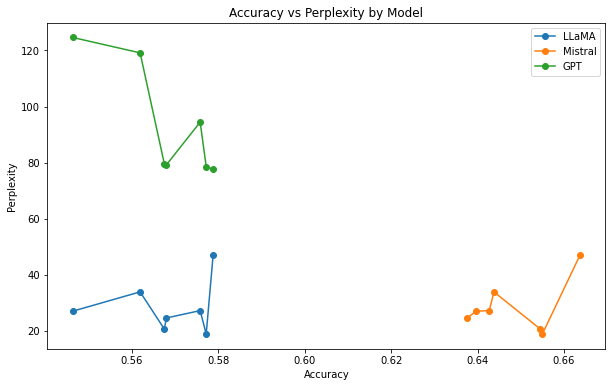

In [1]:
import matplotlib.pyplot as plt

# Data for each model, perplexities and accuracies for 0-shot
data = {
    "LLaMA": {
        "Original": {"accuracy": 0.5788, "perplexity": 46.940},
        "Male": {"accuracy": 0.5758, "perplexity": 27.183},
        "Female": {"accuracy": 0.5680, "perplexity": 24.558},
        "Ambiguous": {"accuracy": 0.5619, "perplexity": 33.862},
        "Young (<20)": {"accuracy": 0.5463, "perplexity": 26.976},
        "Middle Age (20-60)": {"accuracy": 0.5772, "perplexity": 18.845},
        "Old (>60)": {"accuracy": 0.5675, "perplexity": 20.626}
    },
    "Mistral": {
        "Original": {"accuracy": 0.6637, "perplexity": 46.940},
        "Male": {"accuracy": 0.6427, "perplexity": 27.183},
        "Female": {"accuracy": 0.6376, "perplexity": 24.558},
        "Ambiguous": {"accuracy": 0.6438, "perplexity": 33.862},
        "Young (<20)": {"accuracy": 0.6397, "perplexity": 26.976},
        "Middle Age (20-60)": {"accuracy": 0.6550, "perplexity": 18.845},
        "Old (>60)": {"accuracy": 0.6545, "perplexity": 20.626}
    },
    "GPT": {
        "Original": {"accuracy": 0.5788, "perplexity": 77.580},
        "Male": {"accuracy": 0.5758, "perplexity": 94.450},
        "Female": {"accuracy": 0.5680, "perplexity": 79.220},
        "Ambiguous": {"accuracy": 0.5619, "perplexity": 119.160},
        "Young (<20)": {"accuracy": 0.5463, "perplexity": 124.650},
        "Middle Age (20-60)": {"accuracy": 0.5772, "perplexity": 78.590},
        "Old (>60)": {"accuracy": 0.5675, "perplexity": 79.640}
    }
}

# Function to sort data by accuracy
def sort_by_accuracy(model_data):
    return sorted(model_data.items(), key=lambda x: x[1]["accuracy"])

# Prepare the data
for model in data:
    data[model] = sort_by_accuracy(data[model])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for model in data:
    accuracies = [entry[1]["accuracy"] for entry in data[model]]
    perplexities = [entry[1]["perplexity"] for entry in data[model]]
    ax.plot(accuracies, perplexities, '-o', label=model)

ax.set_xlabel("Accuracy")
ax.set_ylabel("Perplexity")
ax.set_title("Accuracy vs Perplexity by Model")
ax.legend()
plt.show()


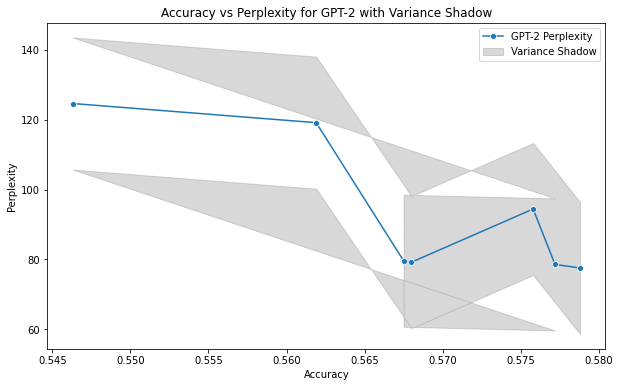

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation
data = {
    "Accuracy": [0.5788, 0.5758, 0.5680, 0.5619, 0.5463, 0.5772, 0.5675],
    "Perplexity": [77.580, 94.450, 79.220, 119.160, 124.650, 78.590, 79.640],
    "QA Set": ["Original", "Male", "Female", "Ambiguous", "Young (<20)", "Middle Age (20-60)", "Old (>60)"]
}

# Creating a DataFrame
gpt_df = pd.DataFrame(data)

# Calculating the upper and lower bounds for the variance shadow
std_dev = np.std(gpt_df["Perplexity"])
gpt_df["Upper Bound"] = gpt_df["Perplexity"] + std_dev
gpt_df["Lower Bound"] = gpt_df["Perplexity"] - std_dev

# Plotting using seaborn for the line and matplotlib for the fill
# Simplifying the plot approach using seaborn and matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot with seaborn
sns.lineplot(data=gpt_df, x="Accuracy", y="Perplexity", marker='o', label="GPT-2 Perplexity", ax=ax)

# Adding variance shadow directly using numpy arrays
ax.fill_between(gpt_df["Accuracy"].values, gpt_df["Lower Bound"].values, gpt_df["Upper Bound"].values, color='gray', alpha=0.3, label="Variance Shadow")

plt.xlabel("Accuracy")
plt.ylabel("Perplexity")
plt.title("Accuracy vs Perplexity for GPT-2 with Variance Shadow")
plt.legend()
plt.show()



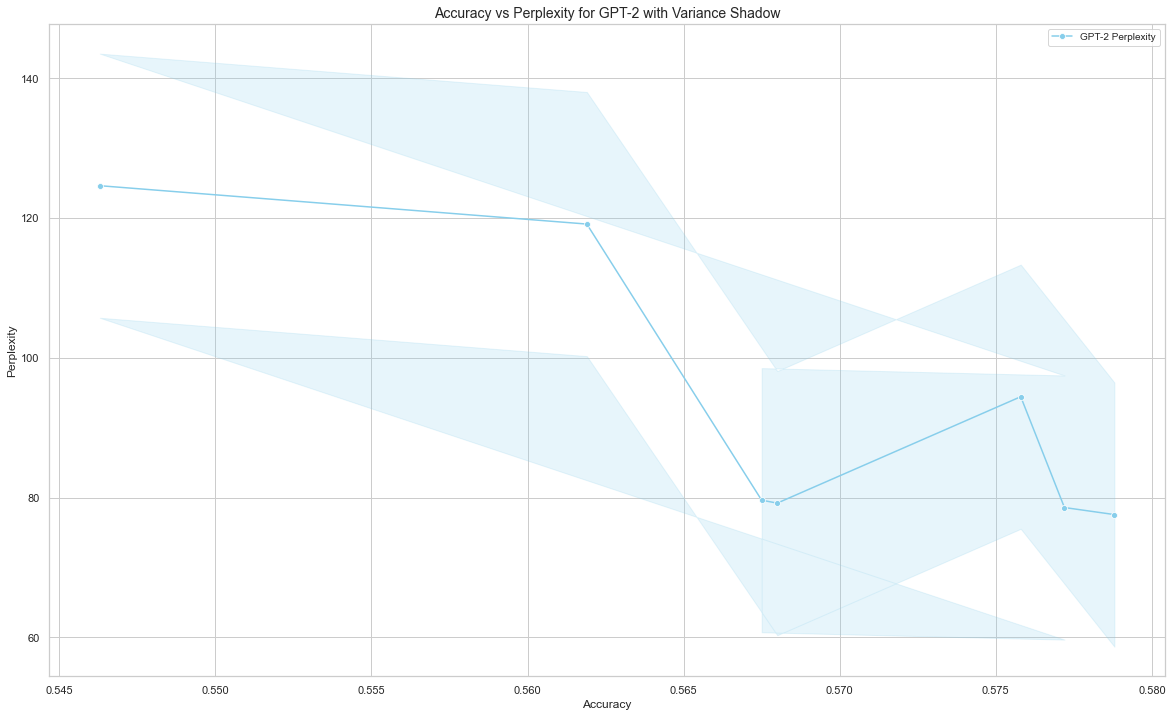

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation
data = {
    "Accuracy": [0.5788, 0.5758, 0.5680, 0.5619, 0.5463, 0.5772, 0.5675],
    "Perplexity": [77.580, 94.450, 79.220, 119.160, 124.650, 78.590, 79.640],
    "QA Set": ["Original", "Male", "Female", "Ambiguous", "Young (<20)", "Middle Age (20-60)", "Old (>60)"]
}

# Creating a DataFrame
gpt_df = pd.DataFrame(data)

# Calculating the upper and lower bounds for the variance shadow
std_dev = np.std(gpt_df["Perplexity"])
gpt_df["Upper Bound"] = gpt_df["Perplexity"] + std_dev
gpt_df["Lower Bound"] = gpt_df["Perplexity"] - std_dev

# Setting style
sns.set(style="whitegrid")

# Plotting using seaborn for the line and matplotlib for the fill
fig, ax = plt.subplots(figsize=(20, 12))
sns.lineplot(data=gpt_df, x="Accuracy", y="Perplexity", marker='o', color='skyblue', label="GPT-2 Perplexity", ax=ax)
plt.fill_between(gpt_df["Accuracy"], gpt_df["Lower Bound"], gpt_df["Upper Bound"], color='skyblue', alpha=0.2)

plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Perplexity", fontsize=12)
plt.title("Accuracy vs Perplexity for GPT-2 with Variance Shadow", fontsize=14)
plt.legend(fontsize=10, title_fontsize=11)
plt.grid(True)
plt.show()
